In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from matplotlib import gridspec
from matplotlib import rcParams
rcParams.update({'font.size': 14})
%matplotlib inline

In [57]:
flights_arr_df = pd.DataFrame()
flights_dep_df = pd.DataFrame()
folder_name = ['AAflights','DLflights','UAflights']
for folder in folder_name:
    for fl in listdir(folder):
        f_path = folder+'/'+fl
        try: temp_df = pd.read_csv(f_path, skiprows = 12)
        except ValueError: print('Could not read %s'%f_path)
        if 'depart' in fl:
            flights_dep_df = flights_dep_df.append(temp_df)
        elif 'arrival' in fl:
            flights_arr_df = flights_arr_df.append(temp_df)

arr_cols = flights_arr_df.columns[flights_arr_df.count()>0]
flights_arr_df = flights_arr_df[arr_cols]
dep_cols = flights_dep_df.columns[flights_dep_df.count()>0]
flights_dep_df = flights_dep_df[dep_cols]

    

Could not read DLflights/.DS_Store


In [157]:
flights_arr_df.head(1)


,Carrier Code,Actual Arrival Time,Actual Elapsed Time(Minutes),Arrival Delay(Minutes),Date (MM/DD/YYYY),DelayCarrier(Minutes),DelayLate Aircraft Arrival(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayWeather(Minutes),Flight Number,Origin Airport,Scheduled Arrival Time,Scheduled Elapsed Time(Minutes),Tail Number,Taxi-in Time(Minutes),Wheels-on Time
0,AA,12:23,412,48,04/01/2014,1970-01-01 00:00:00.000000031,0,17,0,0,59,JFK,11:35,395,N788AA,6,12:17


In [293]:
flights_dep_df.sort_values(dep_cols[5]).head(5)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
615,DL,2015-09-21,1562,N6713Y,MSP,00:05,00:02,206,197,-3,00:15,13,0,0,0,0,0
324,AA,2015-08-07,1965,N170US,CLT,00:05,00:15,303,295,10,00:26,11,0,0,0,0,0
112,DL,2015-09-04,1562,N6706Q,MSP,00:05,00:03,206,199,-2,00:21,18,0,0,0,0,0
277,AA,2015-08-06,1965,N183UW,CLT,00:05,00:04,303,278,-1,00:15,11,0,0,0,0,0
1205,AA,2015-07-26,1965,N541UW,CLT,00:05,23:58,303,281,-7,00:12,14,0,0,0,0,0


In [159]:
flights_dep_df.dtypes

  Carrier Code                                    object
Date (MM/DD/YYYY)                         datetime64[ns]
Flight Number                                    float64
Tail Number                                       object
Destination Airport                               object
Scheduled Departure Time                          object
Actual Departure Time                             object
Scheduled Elapsed Time(Minutes)                  float64
Actual Elapsed Time(Minutes)                     float64
Departure Delay(Minutes)                         float64
Wheels-off Time                                   object
Taxi-out Time(Minutes)                           float64
DelayCarrier(Minutes)                            float64
DelayWeather(Minutes)                            float64
DelayNational Aviation System(Minutes)           float64
DelaySecurity(Minutes)                           float64
DelayLate Aircraft Arrival(Minutes)              float64
dtype: object

In [160]:
flights_arr_df.dtypes

  Carrier Code                                    object
Actual Arrival Time                               object
Actual Elapsed Time(Minutes)                     float64
Arrival Delay(Minutes)                           float64
Date (MM/DD/YYYY)                                 object
DelayCarrier(Minutes)                     datetime64[ns]
DelayLate Aircraft Arrival(Minutes)              float64
DelayNational Aviation System(Minutes)           float64
DelaySecurity(Minutes)                           float64
DelayWeather(Minutes)                            float64
Flight Number                                    float64
Origin Airport                                    object
Scheduled Arrival Time                            object
Scheduled Elapsed Time(Minutes)                  float64
Tail Number                                       object
Taxi-in Time(Minutes)                            float64
Wheels-on Time                                    object
dtype: object

In [122]:
flights_arr_df[arr_cols[5]]=pd.to_datetime(flights_arr_df[arr_cols[5]],
                                           infer_datetime_format=True)
flights_dep_df[dep_cols[1]]=pd.to_datetime(flights_dep_df[dep_cols[1]],
                                           infer_datetime_format=True)

In [219]:
carrier_map = {
    '  AA' : 'AA',
    '  DL' : 'DL',
    '  UA' : 'UA'
}
flights_arr_df[arr_cols[0]]=flights_arr_df[arr_cols[0]].map(carrier_map)
flights_dep_df[dep_cols[0]]=flights_dep_df[dep_cols[0]].map(carrier_map)

In [241]:
A_tot = flights_arr_df.groupby(arr_cols[0])[arr_cols[0]].count()
A_delay = flights_arr_df[flights_arr_df[arr_cols[3]]>0].groupby(arr_cols[0])[arr_cols[1]].count()
A_delay_g30 = flights_arr_df[flights_arr_df[arr_cols[3]]>30].groupby(arr_cols[0])[arr_cols[1]].count()
A_delay_mean = flights_arr_df[flights_arr_df[arr_cols[3]]>0].groupby(arr_cols[0])[arr_cols[3]].mean()
A_delay_std = flights_arr_df[flights_arr_df[arr_cols[3]]>0].groupby(arr_cols[0])[arr_cols[3]].std()

D_tot = flights_dep_df.groupby(dep_cols[0])[dep_cols[0]].count()
D_delay = flights_dep_df[flights_dep_df[dep_cols[9]]>0].groupby(dep_cols[0])[dep_cols[1]].count()
D_delay_g30 = flights_dep_df[flights_dep_df[dep_cols[9]]>30].groupby(dep_cols[0])[dep_cols[1]].count()
D_delay_mean = flights_dep_df[flights_dep_df[dep_cols[9]]>0].groupby(dep_cols[0])[dep_cols[9]].mean()
D_delay_std = flights_dep_df[flights_dep_df[dep_cols[9]]>0].groupby(dep_cols[0])[dep_cols[9]].std()

In [242]:
ddelays = (D_delay.values.astype(float))/(D_tot.values)*100
adelays = (A_delay.values.astype(float))/(A_tot.values)*100
ddelays_g30 = (D_delay_g30.values.astype(float))/(D_tot.values)*100
adelays_g30 = (A_delay_g30.values.astype(float))/(A_tot.values)*100
mean_ddelays = D_delay_mean.values
mean_adelays = A_delay_mean.values
std_ddelays = D_delay_std.values
std_adelays = A_delay_std.values

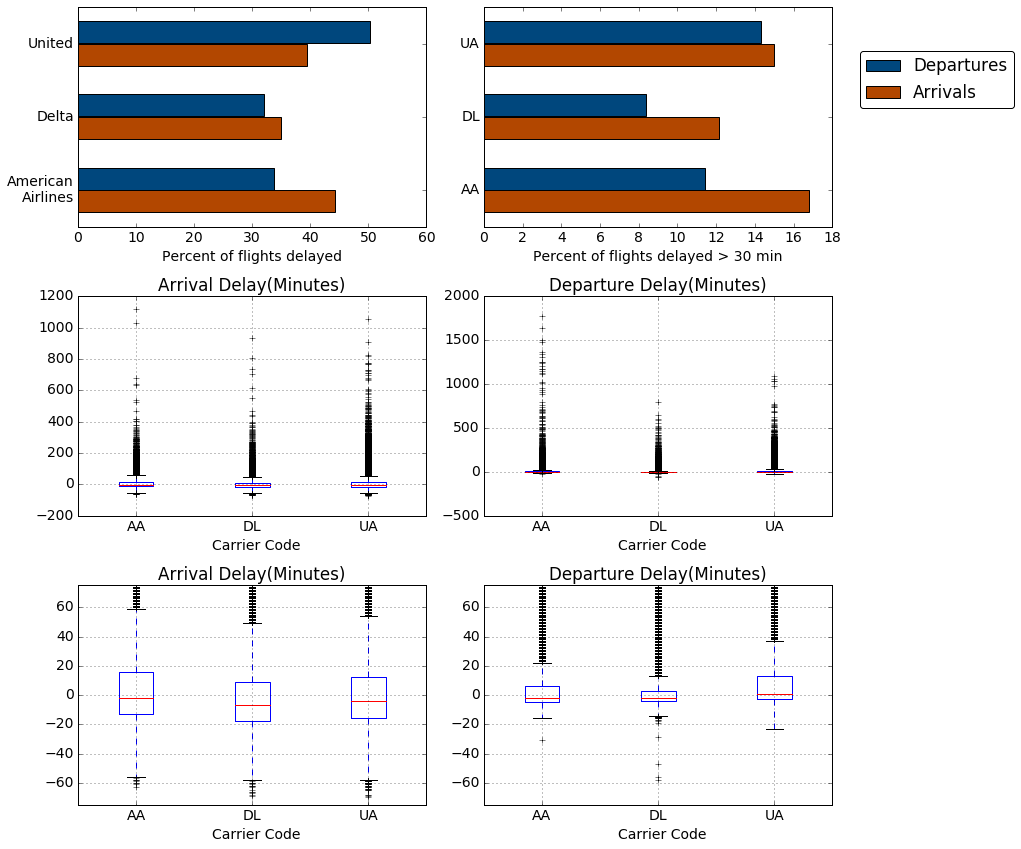

In [289]:
y_pos = [1,2,3]
airlines = ['American\nAirlines','Delta','United']
f,axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
#f.suptitle("Delays at SFO 2014-2015", fontsize=14)
plt.subplot(321)
plt.barh([y+0.155 for y in y_pos],ddelays, 0.3, align='center', color = '#00477D')
plt.barh([y-0.155 for y in y_pos],adelays, 0.3, align='center', color = '#B24700')
plt.xlabel('Percent of flights delayed')
plt.yticks(y_pos,airlines)
ax1 = plt.subplot(322)
ax1.barh([y+0.155 for y in y_pos],ddelays_g30, 0.3, align='center', color = '#00477D')
ax1.barh([y-0.155 for y in y_pos],adelays_g30, 0.3, align='center', color = '#B24700')
plt.xlabel('Percent of flights delayed > 30 min')
plt.yticks(y_pos,['AA','DL','UA'])
plt.legend(['Departures','Arrivals'], loc='lower center', fancybox=True, bbox_to_anchor=(1.3,0.5))

flights_arr_df.boxplot(column = arr_cols[3],by=arr_cols[0], ax=axes[1,0])
flights_dep_df.boxplot(column = dep_cols[9],by=dep_cols[0], ax=axes[1,1])
f1 = flights_arr_df.boxplot(column = arr_cols[3],by=arr_cols[0], ax=axes[2,0])
f1.set_ylim(-75,75)
f2 = flights_dep_df.boxplot(column = dep_cols[9],by=dep_cols[0], ax=axes[2,1])
f2.set_ylim(-75,75)
f.suptitle("")
plt.tight_layout()
plt.savefig('Figure1.pdf')
plt.show()




In [425]:
flights_dep_df['Sched_dep_time'] = [str(x)[:2] for x in flights_dep_df[dep_cols[5]]]
airline_dep_time = flights_dep_df.dropna().groupby([dep_cols[0],'Sched_dep_time'])
dep_time = airline_dep_time[dep_cols[0]].count().unstack()
dep_time = dep_time.append(dep_time.sum(axis=0),ignore_index = True)
dep_time.index = (['AA all','DL all','UA all','Total all'])
dep_time = dep_time.transpose()

airline_dep_time_delay = flights_dep_df[flights_dep_df[dep_cols[9]]>0].dropna().groupby([dep_cols[0],
                                                                                         'Sched_dep_time'])
dep_time_delay = airline_dep_time_delay[dep_cols[0]].count().unstack()                                                                    
dep_time_delay = dep_time_delay.append(dep_time_delay.sum(axis=0),ignore_index = True)
dep_time_delay.index = (['AA delay','DL delay','UA delay','Total delay'])
dep_time_delay = dep_time_delay.transpose()

airline_dep_time_delay_g30 = flights_dep_df[flights_dep_df[dep_cols[9]]>30].dropna().groupby([dep_cols[0],
                                                                                         'Sched_dep_time'])
dep_time_delay_g30 = airline_dep_time_delay_g30[dep_cols[0]].count().unstack()                                                                   
dep_time_delay_g30 = dep_time_delay_g30.append(dep_time_delay_g30.sum(axis=0),ignore_index = True)
dep_time_delay_g30.index = (['AA delay >30','DL delay >30','UA delay >30','Total delay >30'])
dep_time_delay_g30 = dep_time_delay_g30.transpose()

Departures = pd.concat([dep_time,dep_time_delay, dep_time_delay_g30], axis=1)

Departures.head(24)

,AA all,DL all,UA all,Total all,AA delay,DL delay,UA delay,Total delay,AA delay >30,DL delay >30,UA delay >30,Total delay >30
Sched_dep_time,,,,,,,,,,,,
00,974,591,999,2564,394,155,560,1109,100,28,141,269
01,61,NaN,NaN,61,29,NaN,NaN,29,6,NaN,NaN,6
05,638,NaN,1206,1844,127,NaN,353,480,16,NaN,48,64
06,1631,2381,6111,10123,260,376,1627,2263,52,63,276,391
07,2529,1715,3939,8183,420,313,1219,1952,118,39,221,378
08,2035,1568,8269,11872,477,272,3050,3799,138,57,595,790
09,1585,794,6289,8668,361,236,3075,3672,107,41,667,815
10,1229,221,10563,12013,489,25,5992,6506,154,5,1599,1758
11,1600,1884,5438,8922,599,699,3305,4603,213,153,1010,1376


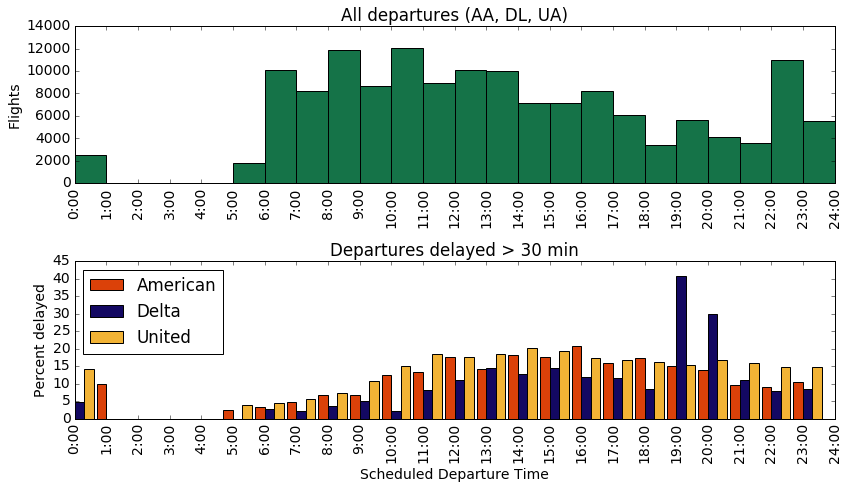

In [444]:
x_pos = Departures.index.astype(int)
hours = [str(x)+':00' for x in range(25)]
all_flights = Departures['Total all']
AA_delay_g30 = 100*Departures['AA delay >30']/Departures['AA all']
DL_delay_g30 = 100*Departures['DL delay >30']/Departures['DL all']
UA_delay_g30 = 100*Departures['UA delay >30']/Departures['UA all']

fig =plt.figure(figsize = (12,7))
plt.subplot(211)
plt.bar(x_pos,all_flights, 1, color = '#157348')
plt.xticks(range(25),hours, rotation=90)
plt.xlim([0,24])
plt.title('All departures (AA, DL, UA)')
plt.ylabel('Flights')

plt.subplot(212)
plt.bar(x_pos-0.3,AA_delay_g30, 0.3,color = '#DB4109')
plt.bar(x_pos,DL_delay_g30, 0.3,color = '#130862')
plt.bar(x_pos+0.3,UA_delay_g30, 0.3,color = '#F2B335')
plt.xlim([0,24])
plt.legend(['American','Delta','United'],loc='upper left')
plt.title('Departures delayed > 30 min')
plt.ylabel('Percent delayed')
plt.xticks(range(25),hours, rotation=90)
plt.xlabel('Scheduled Departure Time')
plt.tight_layout()
plt.savefig('Figure2.pdf')
plt.show()